# Military sites without Nijmegen Kops Plateau

## Contents 
1. [<span style="color:black">Import packages</span>](#1) <a id="one"></a>  
2. [<span style="color:black">Read in data</span>](#2)  <a id="two"></a>  
3. [<span style="color:black">RAAD type number count per settlement type per year in types date ranges</span>](#3) <a id="three"></a>  
4. [<span style="color:black">Frequency distribution of count of types per site</span>](#4) <a id="four"></a>   
4. [<span style="color:black">Plot the graphs</span>](#5) <a id="five"></a>   

### [<span style="color:black">1. Import packages</span>](#one) <a id="1"></a> 

In [1]:
import sys

sys.path.append("../../src")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from calculation import year_object_count_df, sum_freq_per_year, year_freq_df
from plot import plot_graph 

### [<span style="color:black">2. Read in data</span>](#two)  <a id="2"></a>

In [2]:
data = pd.read_csv("../data/RAAD_data_restructured.csv")
data["origin_h2"] = data["origin_h2"].fillna('')
df_dict  = {}

### [<span style="color:black">3. RAAD type number count per settlement type per year in types date range</span>](#three) <a id="3"></a>

In [3]:
df = data.groupby(["site_name_modern", "raad_type_start_date", "raad_type_end_date", "major_site_type"])["RAAD_type_number"].apply(list)
df = df.reset_index()
df = df.rename(columns = {"RAAD_type_number":"List_of_numbers"})

conditions = {"Military sites": df[df["major_site_type"] == "military"],
              "Military sites without Nijmegen Kops Plateau": df[(df["major_site_type"] == "military") & (df["site_name_modern"] != "nijmegen kops plateau")]}

for key, value in conditions.items():
    type_count = year_object_count_df(data = value, 
                                      lower_date = "raad_type_start_date",  
                                      upper_date = "raad_type_end_date",
                                      object_list = "List_of_numbers")  
    
    df_dict[key] = type_count

### [<span style="color:black">4. Frequency distribution of count of types per site</span>](#four) <a id="4"></a>  

In [4]:
filtered = data.filter(items=["site_name_modern", "major_site_type", "RAAD_type_number"])
type_freq_per_site = filtered.groupby(["major_site_type", "site_name_modern"])["RAAD_type_number"].count()
type_freq_per_site = type_freq_per_site.reset_index()

In [5]:
type_freq_per_site.to_csv("type_count.csv", index=False)

### [<span style="color:black">5. Plot the graphs</span>](#five) <a id="5"></a>  

/tmp/ipykernel_14055/1373016955.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


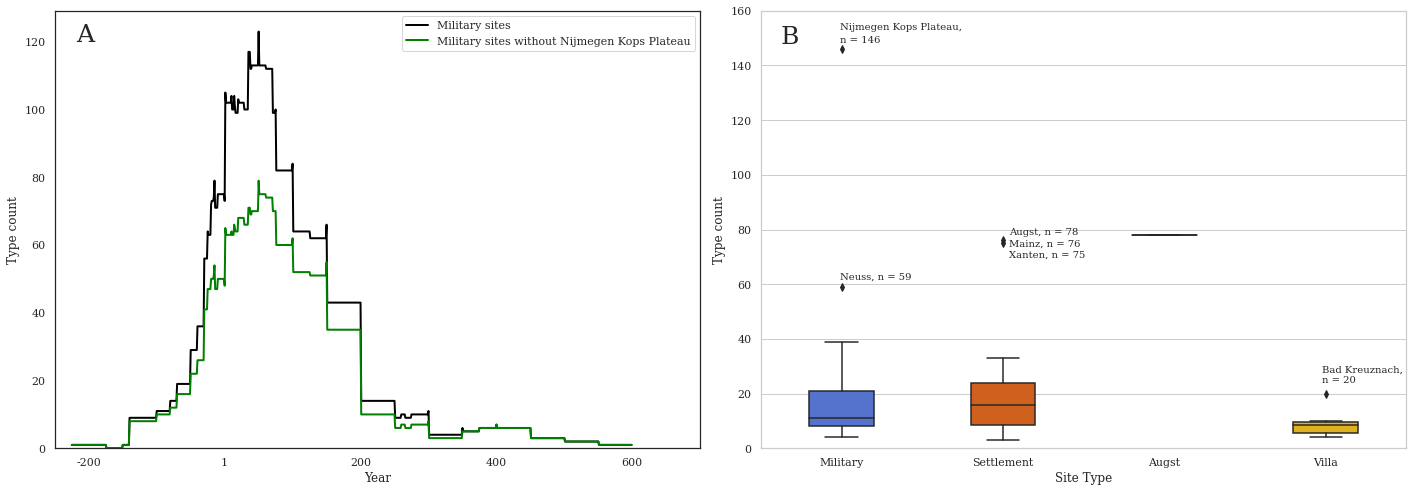

In [13]:
fig = plt.figure(figsize=(20, 7))
gs = fig.add_gridspec(1, 2)

with sns.axes_style("white", {"font.family":"serif", "font.serif":"Times New Roman"}):
    ax = fig.add_subplot(gs[0])
    plot_graph(dicts_of_df = df_dict,
               palette=["black", "green"],
               ax = ax,
               linewidth = 2)

    ax.set_xlim([-250, 700])   
    ax.set_ylim(0, None)
    ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))  
    ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])
    ax.set_ylabel("Type count")
    ax.set_xlabel("Year")
    ax.text(-219, 120, "A", fontsize = 25)

with sns.axes_style("whitegrid", {"font.family":"serif", "font.serif":"Times New Roman"}):
    ax = fig.add_subplot(gs[1])
    sns.boxplot(x = "major_site_type", y = "RAAD_type_number", data = type_freq_per_site, palette=["#4169E1", "#EC5800", "green", "#FFC000"], width = 0.4, ax = ax)
    ax.set_ylabel("Type count")
    ax.set_xlabel("Site Type")
    ax.text(-0.38, 148, "B", fontsize = 25)
    ax.set_ylim([0, 160])
    plt.text(-0.01, 153, "Nijmegen Kops Plateau,",fontsize=10)
    plt.text(-0.01, 148.5, "n = 146",fontsize=10)
    plt.text(-0.01, 62, "Neuss, n = 59",fontsize=10)
    plt.text(1.04, 78, "Augst, n = 78", fontsize=10)
    plt.text(1.04, 74, "Mainz, n = 76", fontsize=10)
    plt.text(1.04, 70, "Xanten, n = 75", fontsize=10)
    plt.text(2.98, 28, "Bad Kreuznach,", fontsize=10)
    plt.text(2.98, 24, "n = 20", fontsize=10)
    ax.set_xticklabels(["Military", "Settlement", "Augst", "Villa"])
  

plt.tight_layout()
plt.savefig("Figs/Fig11.tiff", bbox_inches="tight", format = "tiff", dpi = 400)